In [10]:
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter

def plotSol(u, n):
    u = np.reshape(u, (n, n))
    
    X = np.arange(0, 1, 1 / n)
    Y = np.arange(0, 1, 1 / n)
    X, Y = np.meshgrid(X, Y)

    fig = plt.figure()
    ax = fig.gca(projection='3d')
    
    surf = ax.plot_surface(X, Y, u, cmap=cm.coolwarm)
    plt.savefig("myfig.png", dpi=200)
    plt.show()

iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14
iter 15
iter 16
iter 17
iter 18
iter 19
iter 20
iter 21
iter 22
iter 23
iter 24
iter 25
iter 26
iter 27
iter 28
iter 29
iter 30
iter 31
iter 32
iter 33
iter 34
iter 35
iter 36
iter 37
iter 38
iter 39
iter 40
iter 41
iter 42
iter 43
iter 44
iter 45
iter 46
iter 47
iter 48
iter 49
iter 50
iter 51
iter 52
iter 53
iter 54
iter 55
iter 56
iter 57
iter 58
iter 59


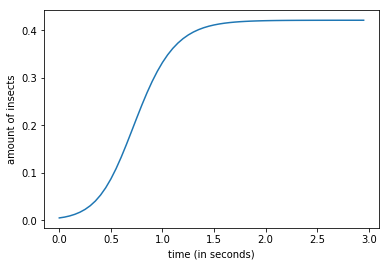

In [25]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
xc = [0.5, 0.5]

def g(x):
    if ((x[0]-xc[0])**2+(x[1]-xc[1])**2 < np.log(2)/10):
        return 0
    return 1 - 4*np.exp(-20*np.linalg.norm(np.subtract(x, xc))**2)

def plotg(dimension):
    temp = [[0 for x in range(dimension)] for y in range(dimension)] 
    for i in range(dimension):
        for j in range(dimension):
            temp[i][j] = g((i/dimension, j/dimension))
    plotSol(temp, dimension)

#S[y][x]
def init_S(n, kappa):
    S = np.zeros((n*n, n*n))
    h = 1/n
    for i in range(n*n):
        gn = g(((i%n)/n, (i//n+0.5)/n))
        ge = g(((i%n+0.5)/n, (i//n)/n))
        gs = g(((i%n)/n, (i//n-0.5)/n))
        gw = g(((i%n-0.5)/n, (i//n)/n))
        
        if (i < n):
            if (i == 0):
                S[i][i] = -(ge+gn)/2-h*kappa
                S[i][i+1] = ge/2
                S[i][i+n] = gn/2
            elif(i == n - 1):
                S[i][i] = -(gw+gn)/2-h*kappa
                S[i][i-1] = gw/2
                S[i][i+n] = gn/2
            else:
                S[i][i] = -gn-(ge+gw)/2-h*kappa
                S[i][i-1] = gw/2
                S[i][i+1] = ge/2
                S[i][i+n] = gn
                
        if (i >= n*(n-1)):
            if (i % n == 0):
                S[i][i] = -(ge+gs)/2-h*kappa
                S[i][i+1] = ge/2
                S[i][i-n] = gs/2
            elif ((i + 1) % n == 0):
                S[i][i] = -(gw+gs)/2-h*kappa
                S[i][i-1] = gw/2
                S[i][i-n] = gs/2
            else:
                S[i][i] = -gs-(ge+gw)/2-h*kappa
                S[i][i-1] = gw/2
                S[i][i+1] = ge/2
                S[i][i-n] = gs
                
        if (n <= i < n*(n-1)):
            if (i % n == 0):
                S[i][i] = -ge-(gs+gn)/2-h*kappa
                S[i][i+1] = ge
                
                S[i][i+n] = gn/2
                S[i][i-n] = gs/2
            elif ((i + 1) % n == 0):
                S[i][i] = -gw -(gs+gn)/2-h*kappa
                S[i][i-1] = gw
                
                S[i][i+n] = gn/2
                S[i][i-n] = gs/2
            else:
                S[i][i] = -gn-ge-gs-gw
                S[i][i-1] = gw
                S[i][i+1] = ge
                S[i][i-n] = gs
                S[i][i+n] = gn
    return S

def init_M(dim):
    D = np.ones(dim)
    D[[0,-1]] = 0.5
    D = np.concatenate((0.5*D,np.tile(D,dim-2),0.5*D))
    M = np.diag(D)
    return (1/(dim*dim))*M

def init_u0(n):
    u = np.zeros((n*n, 1))
    for i in range(0, n*n):
        ycord = (i // n) / n
        xcord = (i % n) / n
        x = (xcord, ycord)
        if (np.linalg.norm(x)**2 < 0.05):
            u[i] = 0.1
    return u

def backwardEuler(M, S, lam, dt, u0, epsilon, dimension, maxiter):
    Minv = np.linalg.inv(M)
    MinvS = Minv @ S
    ukn = ukn1 = u0
    sol = np.zeros((maxiter, dimension*dimension))
    for n in range(maxiter):
        print("iter", n)
        norm = np.inf
        while(norm > epsilon):
            uk1n1 = np.linalg.solve((np.eye(dimension*dimension) - dt*MinvS), (ukn + dt*lam*(ukn1 * (np.ones(ukn1.shape)-ukn1))))
            norm = np.linalg.norm(ukn1 - uk1n1)
            ukn1 = uk1n1
        ukn = ukn1
        
        sol[n,:] = ukn[:,0]
    return sol

def forwardEuler(M, S, lam, dt, u0, dimension, maxiter):
    Minv = np.linalg.inv(M)
    MinvS = Minv @ S
    
    un = un1 = u0
    sol = np.zeros((maxiter, dimension*dimension))
    for n in range(maxiter):
        un1 = un + dt*MinvS.dot(un) + dt*lam*(un*(1-un))
        un = un1
        sol[n,:] = un[:,0]
    return sol

def total_amount(u, dimension):
    sum = 0
    h = 1 / dimension
    h2 = h*h
    for i in range(dimension):
        for j in range(dimension):
            sum+= h2*u[i*dimension + j]
    return sum

def plot_total_amount(u, dimension, iterations, timestep):
    u = np.empty((iterations, 1))
    for i in range(iterations):
        u[i, 0] = total_amount(res[i], dimension)
    x = np.arange(0, iterations*timestep, timestep)
    plt.plot(x, u)
    plt.xlabel("time (in seconds)")
    plt.ylabel("amount of insects")
    plt.savefig("integration.png",dim=200)

#print(init_S(4, 1))
# plt.spy(init_S(6,1))
#plt.matshow(init_S(6,1))
dimension = 25
res = backwardEuler(init_M(dimension), init_S(dimension, 1), 10, 0.05, init_u0(dimension), 1e-6, dimension, 60)
plot_total_amount(res, dimension, 60, 0.05)
#res = forwardEuler(init_M(dimension), init_S(dimension, 1), 10, 0.0004, init_u0(dimension), dimension, 50)
#plotSol(res[36], dimension)
#plotg(50)
#plt.matshow(init_S(10, 1))

<Figure size 432x288 with 0 Axes>